In [3]:
import matplotlib.pyplot as plt
import json, os, sys

In [60]:
def plot_curve(x_series, y1_series, y2_series, num):
    x_point = []
    y1_point = []
    y2_point = []
    path = str("../src/allocated_memory/sampling{0}.data".format(num))
    
    with open(path, 'r') as f:
        line = f.readline()
        while line:
            hash = json.loads(line)
            x_point.append(hash[x_series])
            y1_point.append(1/ (hash[y1_series]* (1/1000)))
            y2_point.append(hash[y2_series])
            line = f.readline()

    fig, ax1 = plt.subplots()
    plt.grid(axis='y', alpha=0.75)
    
    color = "tab:blue"
    
    ax1.plot(x_point, y1_point, color=color)
    ax1.set_xlabel("Memory Size (megabytes)")
    ax1.set_ylabel("Reciprocal of Billed Duration (1/seconds)", color = color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    color = "tab:red"
    
    ax2 = ax1.twinx()
    ax2.set_ylabel("Compute Charge (GB-seconds)", color = color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.plot(x_point, y2_point, color=color)
    
    ax2.plot([1750]*len(y2_point), y2_point, color='orange')
    plt.title("Memory Size Optimization", fontsize=10)

    fig.savefig("../memory_compute_charge.png")

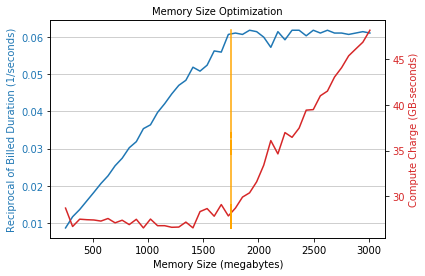

In [61]:
plot_curve('memory_size', 'billed_duration', 'compute_charge', 2)